<a href="https://colab.research.google.com/github/swapnil2009/DataScience/blob/main/Diamonds_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Diamond is a solid form of the element carbon.
* It is the hardest material found on Earth.
* Unlike other non-metals, diamond has a high termal conductivity.
* Due to these reasons, Diamond is a very expensive material.
In the following program, we will prepare a Linear Regression Model to predict the price of diamond given its properties like the cut, purity, etc.

# **1. Domain Knowledge**

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [4]:
# Importing the data set
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Removing the first column coz not needed
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **2. Summary of the Dataset**
The given dataset contains the following attributes:
* carat
* cut
* color
* clarity
* depth
* table
* price

# **3. Is there any data type mismatch in Dataset? If so try to convert the attributes to the required Data type.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We observe that there is NO DATA MISMATCH
* carat -> float
* cut -> obj
* color -> obj
* clarity -> obj
* depth -> float
* table -> float
* price -> int

# **4. Is there any missing values in Dataset? If so mention & justify the method handled for missing values?**


In [7]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


There is a possibility that there ain't any null values but some other entry like "." or "-" .So we check all the unique values in each row to get a beter picture.

In [8]:
l=df.carat.unique()
l.sort()
l

array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52,
       0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
       0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07,
       1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18,
       1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29,
       1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 ,
       1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51,
       1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62,
       1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.

In [9]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
l=df.depth.unique()
l.sort()
l

array([43. , 44. , 50.8, 51. , 52.2, 52.3, 52.7, 53. , 53.1, 53.2, 53.3,
       53.4, 53.8, 54. , 54.2, 54.3, 54.4, 54.6, 54.7, 55. , 55.1, 55.2,
       55.3, 55.4, 55.5, 55.6, 55.8, 55.9, 56. , 56.1, 56.2, 56.3, 56.4,
       56.5, 56.6, 56.7, 56.8, 56.9, 57. , 57.1, 57.2, 57.3, 57.4, 57.5,
       57.6, 57.7, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4, 58.5, 58.6,
       58.7, 58.8, 58.9, 59. , 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7,
       59.8, 59.9, 60. , 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8,
       60.9, 61. , 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9,
       62. , 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63. ,
       63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64. , 64.1,
       64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65. , 65.1, 65.2,
       65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66. , 66.1, 66.2, 66.3,
       66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67. , 67.1, 67.2, 67.3, 67.4,
       67.5, 67.6, 67.7, 67.8, 67.9, 68. , 68.1, 68

In [13]:
l=df.table.unique()
l.sort()
l

array([43. , 44. , 49. , 50. , 50.1, 51. , 51.6, 52. , 52.4, 52.8, 53. ,
       53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1,
       54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55. , 55.1, 55.2,
       55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56. , 56.1, 56.2, 56.3,
       56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57. , 57.1, 57.2, 57.3, 57.4,
       57.5, 57.6, 57.7, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4, 58.5,
       58.6, 58.7, 58.8, 58.9, 59. , 59.1, 59.2, 59.3, 59.4, 59.5, 59.6,
       59.7, 59.8, 59.9, 60. , 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7,
       60.8, 60.9, 61. , 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8,
       61.9, 62. , 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.8, 63. , 63.3,
       63.4, 63.5, 64. , 64.2, 64.3, 65. , 65.4, 66. , 67. , 68. , 69. ,
       70. , 71. , 73. , 76. , 79. , 95. ])

In [14]:
l=df.price.unique()
l.sort()
l

array([  326,   327,   334, ..., 18806, 18818, 18823])

Therefore we conclude that THERE ARE NO NULL VALUES in the given dataset

# **6. Is there any categorical variables in Dataset? What are they? Convert the categorical values to numeric.**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We see that there are 3 categorical features:
1. cut
2. color
3. clarity

In [16]:
print(df.cut.unique())
df.cut.replace(["Fair","Ideal","Good","Very Good","Premium"],[0,1,2,3,4],inplace=True)
print(df.cut.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
[1 4 2 3 0]


<ipython-input-16-1261e9ad209c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.cut.replace(["Fair","Ideal","Good","Very Good","Premium"],[0,1,2,3,4],inplace=True)
<ipython-input-16-1261e9ad209c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.cut.replace(["Fair","Ideal","Good","Very Good","

In [17]:
print(df.color.unique())
df.color.replace(['E', 'I', 'J', 'H', 'F', 'G', 'D'],[0,1,2,3,4,5,6],inplace=True)
print(df.color.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
[0 1 2 3 4 5 6]


<ipython-input-17-120d1f53af41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.color.replace(['E', 'I', 'J', 'H', 'F', 'G', 'D'],[0,1,2,3,4,5,6],inplace=True)
<ipython-input-17-120d1f53af41>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.color.replace(['E', 'I', 'J', 'H', 'F', 'G', 'D'],[0

In [18]:
print(df.clarity.unique())
df.clarity.replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], [0,1,2,3,4,5,6,7],inplace=True)
print(df.clarity.unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
[0 1 2 3 4 5 6 7]


<ipython-input-18-0de2caec84b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.clarity.replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], [0,1,2,3,4,5,6,7],inplace=True)
<ipython-input-18-0de2caec84b0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.clarity.replace(['SI2', 'S

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Now we have converted all the categorical data types to integer data types by the replace method.

# **5. Is there any Outliers in Dataset? Mention the methods for outliers detection, which method is the best one justify & remove outliers using the same method.**

USING GRAPHS

In [20]:
import warnings
warnings.filterwarnings('ignore')

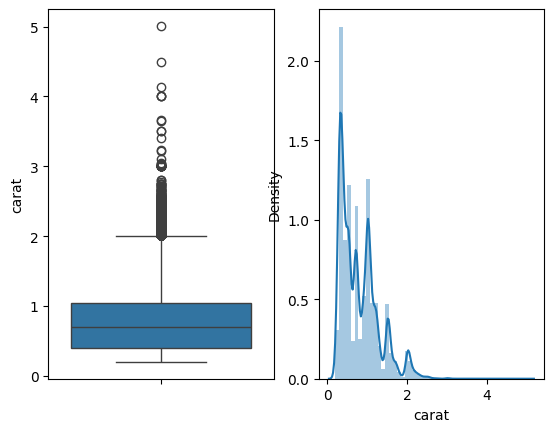

In [21]:
# OUTLIERS IN CARAT
plt.subplot(1,2,1)
p1=sns.boxplot(df.carat)
plt.subplot(1,2,2)
p2=sns.distplot(df.carat)

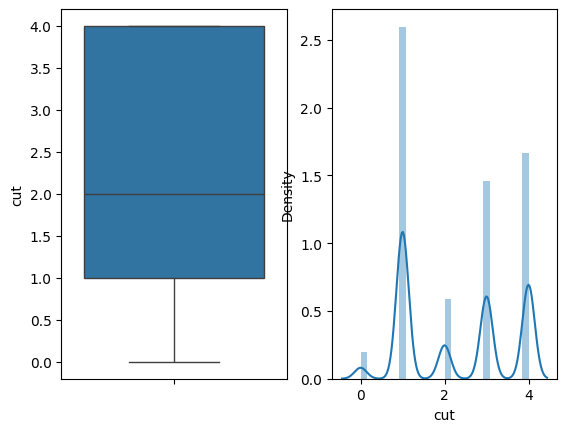

In [22]:
# OUTLIERS IN CUT
plt.subplot(1,2,1)
p1=sns.boxplot(df.cut)
plt.subplot(1,2,2)
p2=sns.distplot(df.cut)

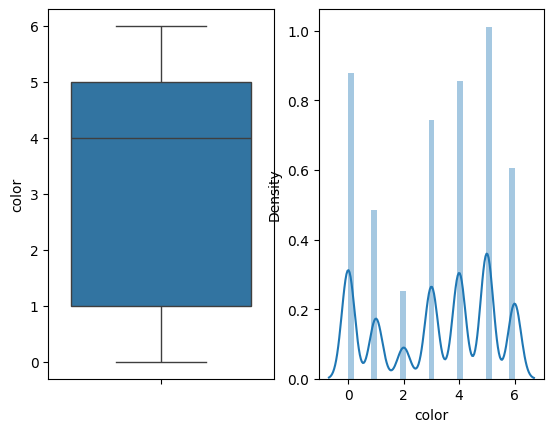

In [23]:
# OUTLIERS IN COLOR
plt.subplot(1,2,1)
p1=sns.boxplot(df.color)
plt.subplot(1,2,2)
p2=sns.distplot(df.color)

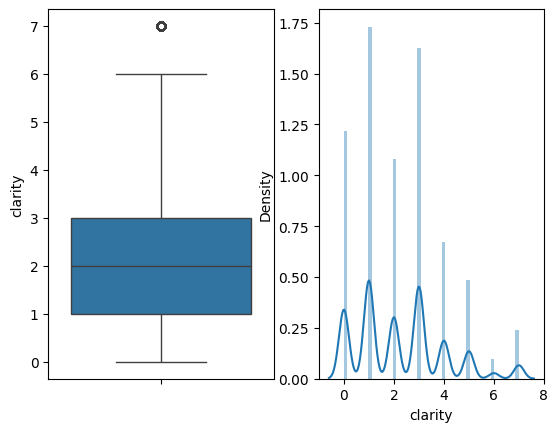

In [24]:
# OUTLIERS IN CLARITY
plt.subplot(1,2,1)
p1=sns.boxplot(df.clarity)
plt.subplot(1,2,2)
p2=sns.distplot(df.clarity)

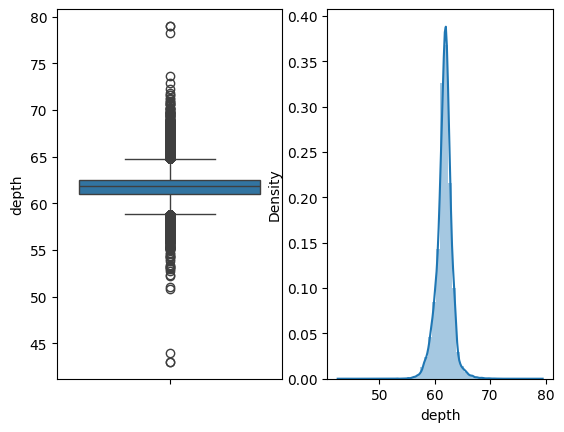

In [25]:
# OUTLIERS IN DEPTH
plt.subplot(1,2,1)
p1=sns.boxplot(df.depth)
plt.subplot(1,2,2)
p2=sns.distplot(df.depth)

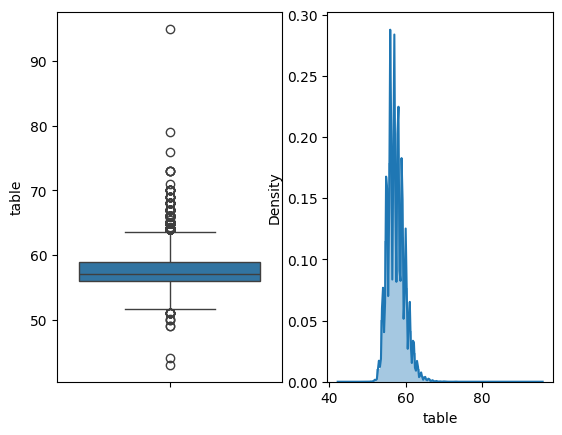

In [26]:
# OUTLIERS IN TABLE
plt.subplot(1,2,1)
p1=sns.boxplot(df.table)
plt.subplot(1,2,2)
p2=sns.distplot(df.table)

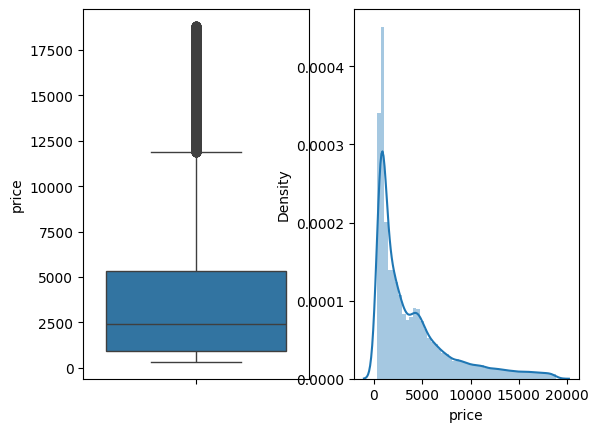

In [27]:
# OUTLIERS IN PRICE
plt.subplot(1,2,1)
p1=sns.boxplot(df.price)
plt.subplot(1,2,2)
p2=sns.distplot(df.price)

CREATING A NEW VARIABLE FOR A DATA SET WITH NO OUTLIERS.

In [28]:
new_df=df.copy(deep=True)
print(df.shape,new_df.shape)

(53940, 10) (53940, 10)


In [29]:
def Outliers_Treatment(new_df,col):
    q1=new_df[col].quantile(0.25)
    q3=new_df[col].quantile(0.75)
    iqr=q3-q1
    print(col,iqr)
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    p1=plt.subplot(1,2,1)
    sns.boxplot(df[col])
    p2=plt.subplot(1,2,2)
    sns.boxplot(new_df[col])
    plt.show()
    new_df.drop(new_df[(new_df[col]<lb) | (new_df[col]>ub)].index, inplace=True)

The IQR value for each feature:
carat 0.64


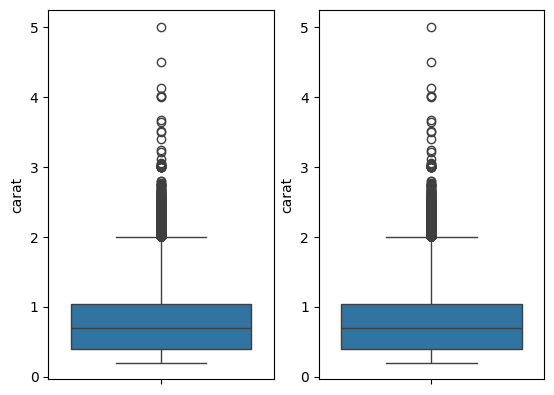

cut 3.0


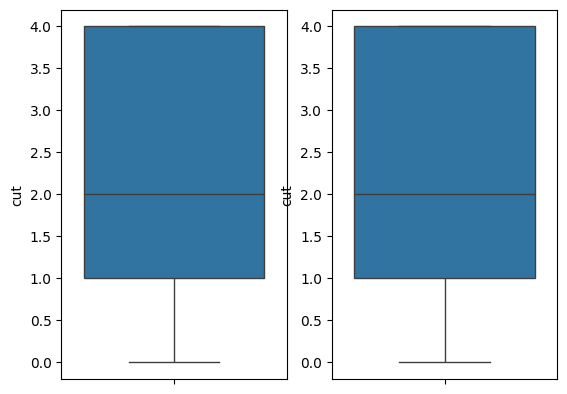

color 4.0


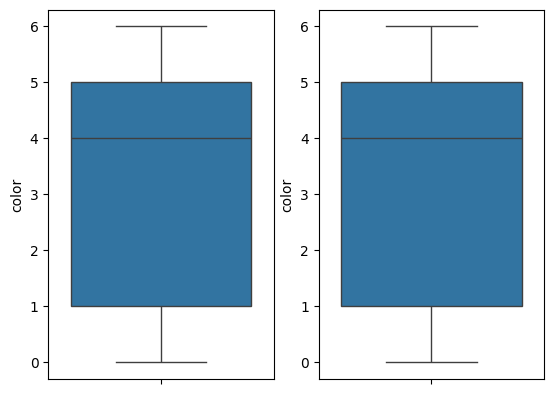

clarity 2.0


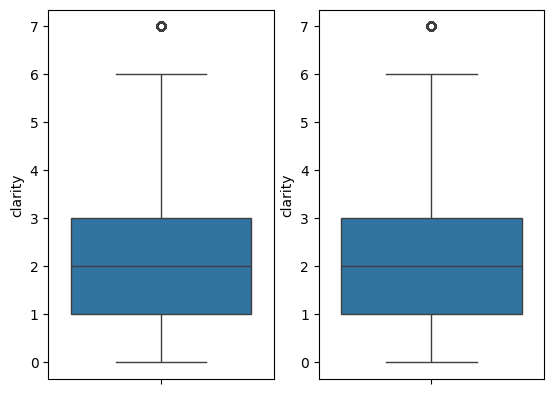

depth 1.3999999999999986


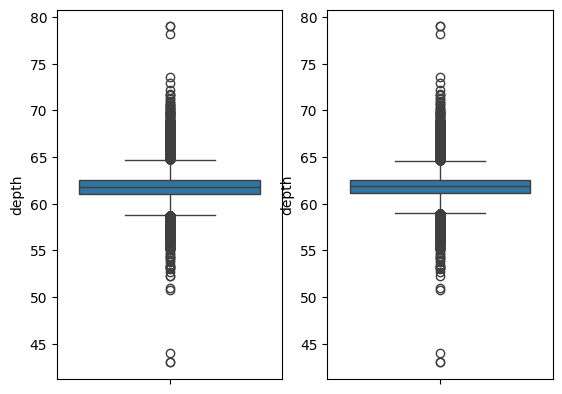

table 3.0


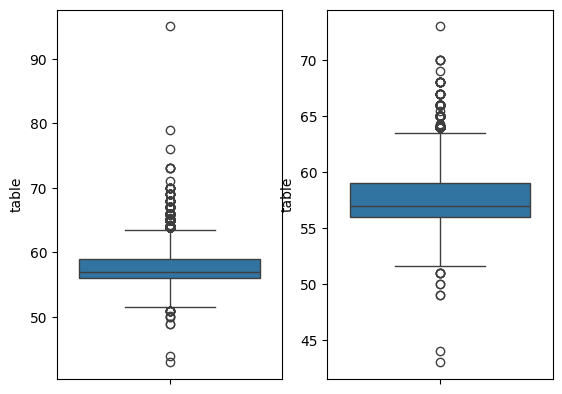

price 4096.0


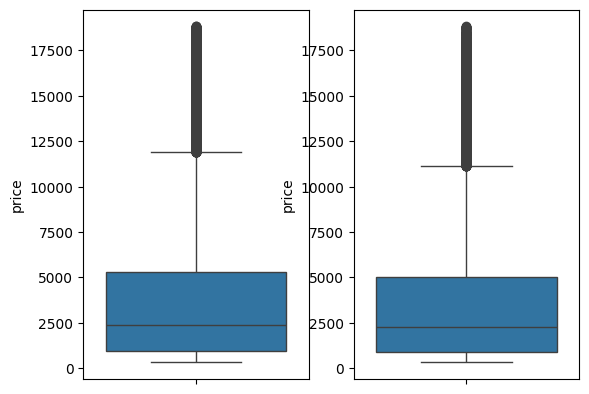

x 1.75


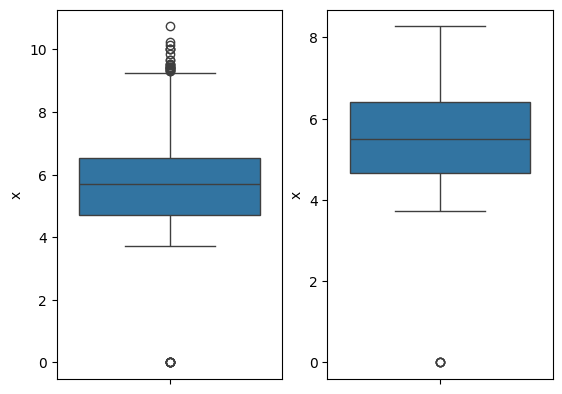

y 1.7300000000000004


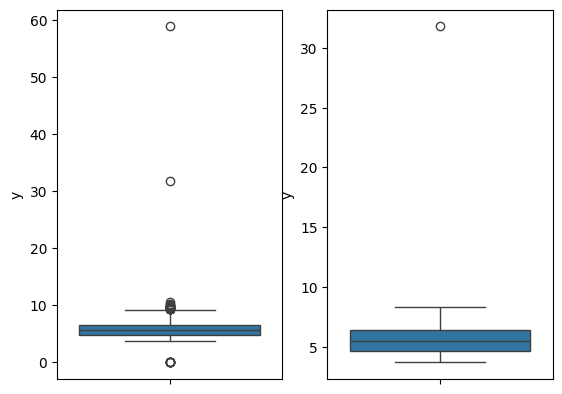

z 1.0900000000000003


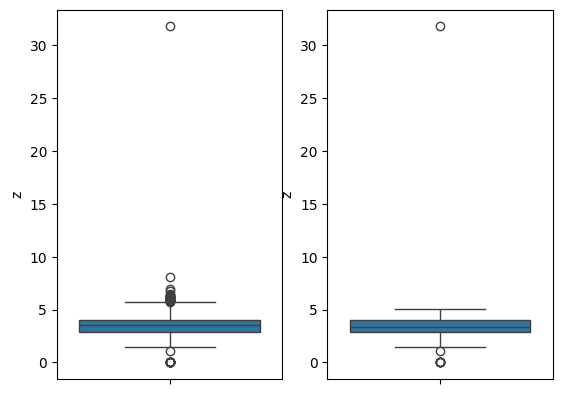

In [30]:
print("The IQR value for each feature:")
Outliers_Treatment(new_df,"carat")
Outliers_Treatment(new_df,"cut")
Outliers_Treatment(new_df,"color")
Outliers_Treatment(new_df,"clarity")
Outliers_Treatment(new_df,"depth")
Outliers_Treatment(new_df,"table")
Outliers_Treatment(new_df,"price")
Outliers_Treatment(new_df,"x")
Outliers_Treatment(new_df,"y")
Outliers_Treatment(new_df,"z")

# **7.Find input & output variables with the help of Correlation Matrix & heat map.**

WITH OUTLIERS

In [31]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.276103,3.174416,2.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.299772,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,1.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,3.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: >

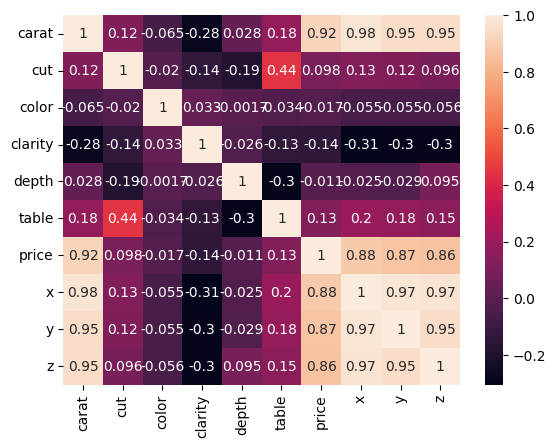

In [32]:
m=df.corr()
sns.heatmap(m, annot=True)

In [33]:
m.price.sort_values(ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
cut,0.098074
depth,-0.010647
color,-0.016560
clarity,-0.140270


In [34]:
# Initialising input feature: carat
x=df.carat.values.reshape(-1,1)
x

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

In [35]:
# Initialising output feature: price
y=df.price.values.reshape(-1,1)
y

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]])

WITHOUT OUTLIERS

In [36]:
new_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.130327,-0.046129,-0.291837,0.038444,0.179397,0.925713,0.986422,0.985544,0.985240
cut,0.130327,1.000000,-0.015193,-0.122461,-0.121579,0.554758,0.087173,0.128476,0.117266,0.109982
color,-0.046129,-0.015193,1.000000,0.006738,-0.010152,-0.023508,0.003646,-0.036850,-0.037249,-0.037727
clarity,-0.291837,-0.122461,0.006738,1.000000,-0.048475,-0.109854,-0.138798,-0.305679,-0.303599,-0.307642
depth,0.038444,-0.121579,-0.010152,-0.048475,1.000000,-0.228592,0.010070,-0.008447,-0.010181,0.093821
table,0.179397,0.554758,-0.023508,-0.109854,-0.228592,1.000000,0.131115,0.176573,0.171112,0.150680
price,0.925713,0.087173,0.003646,-0.138798,0.010070,0.131115,1.000000,0.904401,0.905389,0.901257
x,0.986422,0.128476,-0.036850,-0.305679,-0.008447,0.176573,0.904401,1.000000,0.998473,0.993372
y,0.985544,0.117266,-0.037249,-0.303599,-0.010181,0.171112,0.905389,0.998473,1.000000,0.993188
z,0.985240,0.109982,-0.037727,-0.307642,0.093821,0.150680,0.901257,0.993372,0.993188,1.000000


<Axes: >

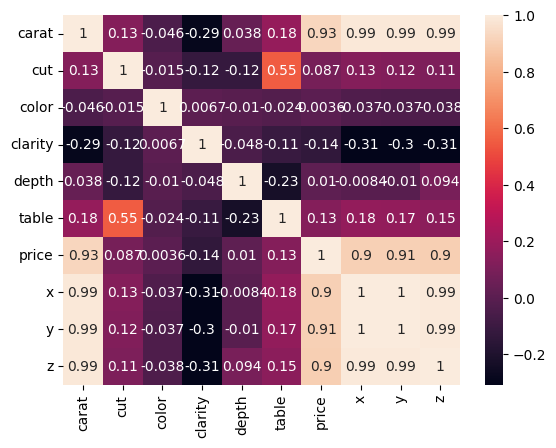

In [37]:
sns.heatmap(new_df.corr(), annot=True)

In [38]:
new_df.corr()["price"].sort_values(ascending=False)

,price
price,1.000000
carat,0.925713
y,0.905389
x,0.904401
z,0.901257
table,0.131115
cut,0.087173
depth,0.010070
color,0.003646
clarity,-0.138798


In [39]:
new_x=new_df.carat.values.reshape(-1,1)
new_y=new_df.price.values.reshape(-1,1)
x,y

(array([[0.23],
        [0.21],
        [0.23],
        ...,
        [0.7 ],
        [0.86],
        [0.75]]),
 array([[ 326],
        [ 326],
        [ 327],
        ...,
        [2757],
        [2757],
        [2757]]))

# **8. Data splitting**

WITH OUTLIERS

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)
x_train,x_test, y_train,y_test

(array([[0.74],
        [0.33],
        [0.57],
        ...,
        [0.4 ],
        [0.89],
        [0.51]]),
 array([[0.52],
        [0.25],
        [1.2 ],
        ...,
        [2.  ],
        [0.31],
        [1.13]]),
 array([[1913],
        [ 686],
        [1728],
        ...,
        [1123],
        [4127],
        [1284]]),
 array([[ 1582],
        [  462],
        [ 7909],
        ...,
        [16439],
        [  558],
        [ 4214]]))

In [41]:
# Checing if the entries are equal in the x,y parameters for each
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((43152, 1), (10788, 1), (43152, 1), (10788, 1))

WITHOUT OUTLIERS

In [42]:
nx_train,nx_test,ny_train,ny_test=train_test_split(new_x, new_y, test_size=0.2, shuffle=True)
nx_train.shape,nx_test.shape, ny_train.shape,ny_test.shape

((35998, 1), (9000, 1), (35998, 1), (9000, 1))

# **9. Predict the Price of diamonds by using Simple liner regression model.**

WITH OUTLIERS

[[ 5498.43235132]
 [13248.51075208]
 [20998.58915284]]


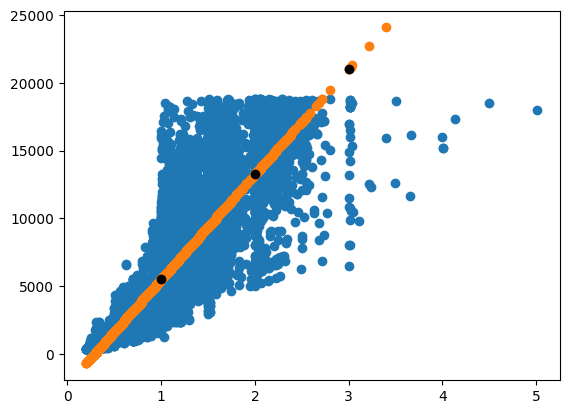

In [43]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# Predicting on the test dataset
y_pred=lm.predict(x_test)
plt.scatter(x,y)
plt.scatter(x_test,y_pred)

#Making predictions
X=np.array([1,2,3]).reshape(-1,1)
Y=lm.predict(X)
print(Y)
plt.plot(X,Y,"ok")

WITHOUT THE OUTLIERS

[[ 5000.89452227]
 [11679.49625331]
 [18358.09798434]]


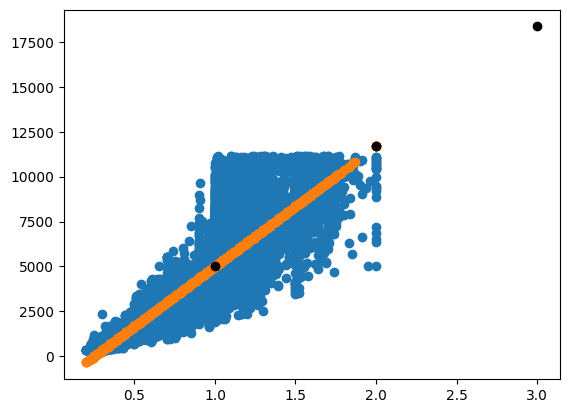

In [44]:
lm1=LinearRegression()
lm1.fit(nx_train,ny_train)
ny_pred=lm1.predict(nx_test)
plt.scatter(new_x,new_y)
plt.scatter(nx_test,ny_pred)

#Making predictions
X=np.array([1,2,3]).reshape(-1,1)
Y=lm1.predict(X)
print(Y)
plt.plot(X,Y,"ok")

# **10. Compare the performance measures with & without outliers.**

WITH OUTLIERS

In [45]:
mae(y_test,y_pred),np.sqrt(mse(y_test,y_pred))

(1011.5781765618055, 1557.271139261955)

WITHOUT OUTLIERS

In [46]:
mae(ny_test,ny_pred),np.sqrt(mse(ny_test,ny_pred))

(651.3811694551285, 991.719921210147)

# **11. Compare the performance measures with & without Feature Scaling.**

# **12. Find other target variable rather than Price and make prediction for the same using Simple liner regression model.**

# **13. Make Predictions for any input carat value of your choice.**

WITH OUTLIERS

In [47]:
X=np.array([1,2,3]).reshape(-1,1)
Y=lm.predict(X)
for i in range (0,3):
    print(X[i], Y[i])

[1] [5498.43235132]
[2] [13248.51075208]
[3] [20998.58915284]


WITHOUT OUTLIERS

In [48]:
X=np.array([1,2,3]).reshape(-1,1)
Y=lm1.predict(X)
for i in range (0,3):
    print(X[i], Y[i])

[1] [5000.89452227]
[2] [11679.49625331]
[3] [18358.09798434]
